## 牛顿方法

In [47]:
# 对多元向量函数
def newton_method_for_vector(f, x0, fprime, tol=1e-10, num_epochs=200):
    x = []
    x.append(x0)
    fprime_inv = np.linalg.inv(fprime(x0)) # 假设Jacobian是方块并可逆的
    for k in range(num_epochs):
        x.append(x[k] - fprime_inv @ f(x[k])) # 迭代公式
        fprime_inv = np.linalg.inv(fprime(x[k]))
        
        if sum(abs(f(x[k+1]))) < tol:
            print("the number of iteration: ", k+1)
            break
    
    return  x[-1], x

In [69]:
# 对多元标量函数
def newton_method_for_scalar(f, x0, fprime, tol=1e-10, num_epochs=200):
    x = []
    x.append(x0)
    for k in range(num_epochs):
        grad = fprime(np.array(x[k]))
        x.append((x[k] - (1 / grad) * f(x[k])).tolist()) # 迭代公式
        if abs(f(x[k+1])) < tol:
            print("the number of iteration: ", k+1)
            break
    
    return  x[-1], x

## 给定$f(x,y)=\bigg[\begin{matrix} y-x^3-2x^2+1 \\ y +x^2-1\end{matrix}\bigg]$, 找到 $\vec x^*$使得$f(\vec x^*)=\vec 0$

In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy
sympy.init_printing()

In [3]:
x = np.linspace(-4, 2, 100)
y1 = x**3 + 2 * x**2 - 1
y2 = -x**2 + 1

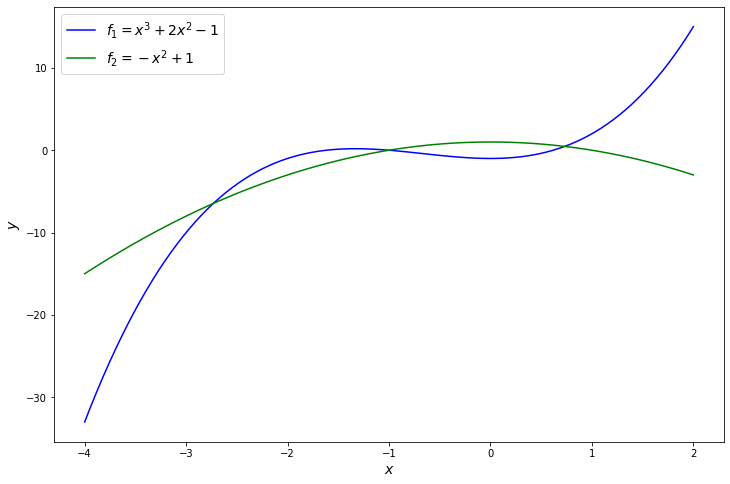

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(x, y1, c='b', label="$f_1=x^3 + 2x^2 - 1$")
plt.plot(x, y2, c='g', label="$f_2=-x^2 + 1$")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [5]:
x, y = sympy.symbols("x, y")
f1 = y - x**3 - 2 * x**2 + 1
f2 = y + x**2 - 1
f = sympy.Matrix([f1, f2])
f.jacobian(sympy.Matrix([x, y]))  # 使用符号微分法计算Jacobian矩阵

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

In [6]:
def f(X):
    return np.array([X[1] - X[0]**3 - 2 * X[0]**2 + 1, X[1] + X[0]**2 - 1])

def f_jacobian(X):
    return np.array([[-3 * X[0]**2 - 4 * X[0], 1], [2 * X[0], 1]])

In [7]:
root1, root1_lst = newton_method(f, [-3, -7], f_jacobian)
root1

the number of iteration:  6


array([-2.73205081, -6.46410162])

In [8]:
root2, root2_lst = newton_method(f, [-1.5, -2], f_jacobian)
root2

the number of iteration:  6


array([-1.00000000e+00,  5.30422638e-17])

In [9]:
root3, root3_lst = newton_method(f, [1, 1], f_jacobian)
root3

the number of iteration:  6


array([0.73205081, 0.46410162])

### 迭代过程

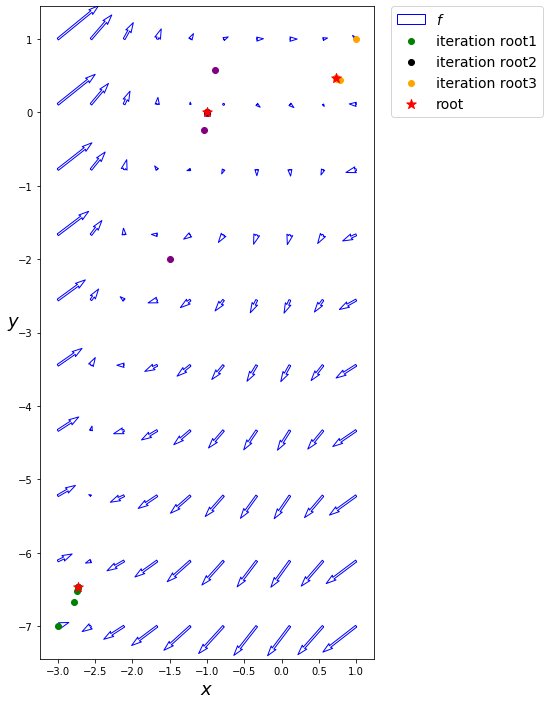

In [10]:
X = np.linspace(-3, 1, 10)
Y = np.linspace(-7, 1, 10)
X, Y = np.meshgrid(X, Y)
X1 = Y - X**3 - 2 * X**2 + 1
X2 = Y + X**2 - 1

fig = plt.figure(figsize=(6, 12))
ax = fig.add_subplot(111)
ax.quiver(X, Y, X1, X2, edgecolor='b', facecolor='None', linewidth=1, label="$f$")
for i, r in enumerate(root1_lst[0:-1]):
    ax.scatter(r[0], r[1], color='g')
    if i == len(root1_lst[0:-1]) -1 :
        ax.scatter(r[0], r[1], color='g', label="iteration root1")

for i, r in enumerate(root2_lst[0:-1]):
    ax.scatter(r[0], r[1], color='purple')
    if i == len(root2_lst[0:-1]) -1 :
        ax.scatter(r[0], r[1], color='black', label="iteration root2")

for i, r in enumerate(root3_lst[0:-1]):
    ax.scatter(r[0], r[1], color='orange')
    if i == len(root3_lst[0:-1]) -1 :
        ax.scatter(r[0], r[1], color='orange', label="iteration root3")
        
ax.scatter(root1[0], root1[1], marker='*', color='r', s=100, label="root")
ax.scatter(root2[0], root2[1], marker='*', color='r', s=100)
ax.scatter(root3[0], root3[1], marker='*', color='r', s=100)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend(loc=2, fontsize=14, bbox_to_anchor=(1.05,1.0),borderaxespad=0.)  
plt.show()

### 使用 `Scipy`

In [11]:
from scipy import optimize

optimize.fsolve(f, [-3, -10], fprime=f_jacobian)

array([-2.73205081, -6.46410162])

In [12]:
optimize.fsolve(f, [-1.5, -2], fprime=f_jacobian)

array([-1.0000000e+00,  4.0059414e-13])

In [13]:
optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

## 2. $f(x, y)=(x+3y)^2$ + 10, 找到 $f(x, y)=0$的根

In [81]:
f = lambda X: (X[0] + 3 * X[1])**2

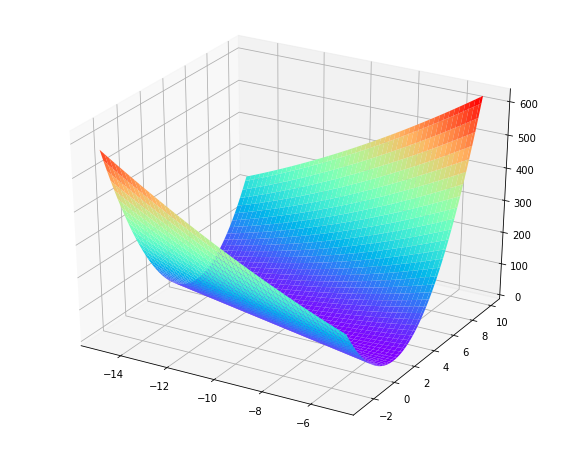

In [118]:
x1n = np.linspace(-15, -5, 100)
x2n = np.linspace(-3, 10, 100)
xx1n, xx2n = np.meshgrid(x1n, x2n)
XX = np.c_[xx1n.ravel(), xx2n.ravel()]
Z = np.array([f(xx) for xx in XX]).reshape(xx1n.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx1n, xx2n, Z, cmap="rainbow")
plt.show()

In [89]:
from autograd import grad

f_prime = grad(f)  # 使用自动微分法计算微分

In [95]:
root, root_lst = newton_method_for_scalar(f, [-1., 3], f_prime)
root

the number of iteration:  1


### 迭代过程

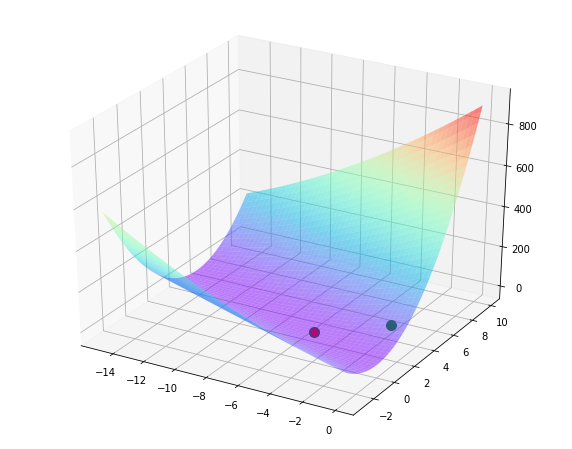

In [117]:
x1n = np.linspace(-15, 0, 100)
x2n = np.linspace(-3, 10, 100)
xx1n, xx2n = np.meshgrid(x1n, x2n)
XX = np.c_[xx1n.ravel(), xx2n.ravel()]
Z = np.array([f(xx) for xx in XX]).reshape(xx1n.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for r in root_lst:
    ax.scatter([r[0]], [r[1]], [f(r)], color='g', s=100)
ax.scatter(root[0], root[1], f(root), color='r', marker="*", s=100)
ax.plot_surface(xx1n, xx2n, Z, cmap="rainbow", alpha=0.5)
plt.show()